<a href="https://colab.research.google.com/github/helghand1/MAT421/blob/main/Module_H_Ordinary_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hussein ElGhandour
## MAT 421
### Module H: Ordinary Differential Equations

### ODE Initial Value Problem Statement

### Introduction

An ordinary differential equation (ODE) describes the relationship between a function, its derivatives, and an independent variable. Initial value problems (IVPs) form a specific class of ODEs where the solution is determined based on known values at a starting point. These problems typically arise in physical systems where an initial state governs future behavior, such as the motion of a pendulum or the rate of chemical reactions. A general ODE of order n can be written as $F(x,f(x),f′(x),…,f(n)(x))=0$, and the initial conditions are specified for the function and its first $n–1$ derivatives at a given point. Solving an IVP involves finding a particular solution that satisfies both the differential equation and the initial conditions. Because exact solutions are often difficult or impossible to find analytically, numerical methods are essential for approximating solutions to initial value problems in science and engineering contexts.

### Reduction of Order

### Introduction

Most numerical methods for solving differential equations are designed for first-order ODEs. To apply these methods to higher-order equations, we must first reduce them to an equivalent system of first-order ODEs. This is done by defining a state vector $S(t)$, which contains the original function and its derivatives up to order $n−1$. The derivative of this state vector $\frac{dS}{dt}$​ can then be expressed in terms of the state itself, forming a system of first-order equations. This transformation preserves the problem's structure while making it compatible with standard numerical solvers. For example, the second-order pendulum equation can be rewritten as a system of two first-order equations by introducing $Θ(t)$ and $\dot{\Theta}(t)$ as state variables. This method is essential for implementing numerical solvers on higher-order systems.

### Reduction of Order: Example with Pendulum

To numerically solve a second-order differential equation, we must first reduce it to a system of first-order equations. Consider the simple pendulum equation:

$$
\frac{d^2\Theta(t)}{dt^2} = -\frac{g}{l} \Theta(t)
$$

We define a state vector:

$$
S(t) =
\begin{bmatrix}
\Theta(t) \\
\dot{\Theta}(t)
\end{bmatrix}
$$

Taking the derivative of $S(t)$, we obtain:

$$
\frac{dS(t)}{dt} =
\begin{bmatrix}
\dot{\Theta}(t) \\
-\frac{g}{l} \Theta(t)
\end{bmatrix}
$$

This gives us a system of first-order ODEs:

$$
\frac{d}{dt}
\begin{bmatrix}
\Theta(t) \\
\dot{\Theta}(t)
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\
-\frac{g}{l} & 0
\end{bmatrix}
\begin{bmatrix}
\Theta(t) \\
\dot{\Theta}(t)
\end{bmatrix}
$$

This reduced system is now in a form suitable for applying numerical solvers such as the Euler method.


### The Euler Method

### Introduction

The Euler Method is a fundamental numerical technique for solving first-order initial value problems of the form $\frac{dS}{dt} = F(t, S(t))$. It approximates the solution by taking small steps along the direction of the derivative, using the formula:

$$
Sj+1​=Sj​+h⋅F(tj​,Sj​)
$$

where $h$ is the step size, and $(t_j, S_j)$ represents the current time and state. Starting from an initial value $S_0$, the method iteratively estimates the solution over a discretized interval. The Euler Method is simple and efficient for problems where high precision is not critical, but it can accumulate significant error for large step sizes or stiff systems. Despite its limitations, it forms the foundation for more advanced numerical solvers and is widely used in educational and practical applications.

### Python Implementation

This implementation approximates the solution of a first-order ODE using the Explicit Euler Formula. It steps through the time domain using the derivative at each point to estimate the next value of the solution.

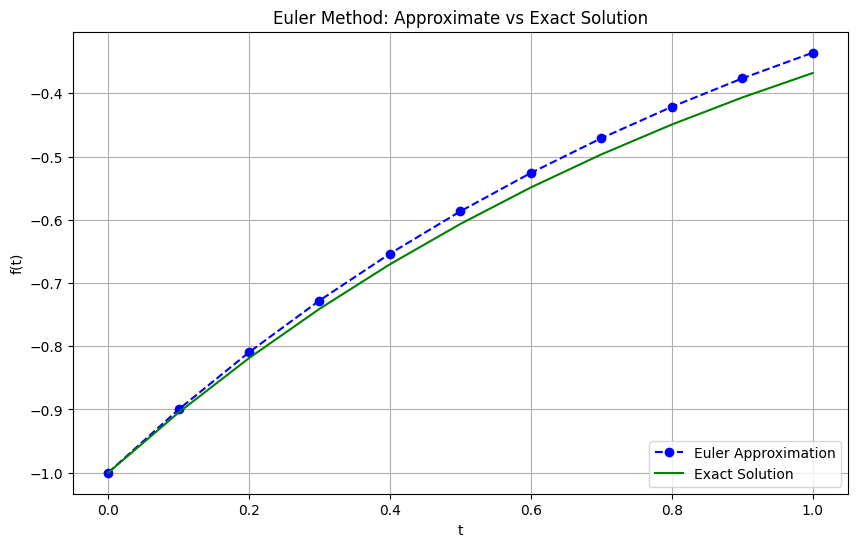

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE: df/dt = -f(t), with exact solution f(t) = -e^{-t}
def f(t, s):
    return np.exp(-t)

# Step size and time grid
h = 0.1
t = np.arange(0, 1 + h, h)

# Initial condition
s0 = -1

# Initialize solution array
s = np.zeros(len(t))
s[0] = s0

# Euler method loop
for i in range(len(t) - 1):
    s[i + 1] = s[i] + h * f(t[i], s[i])

# Plotting the approximate vs. exact solution
plt.figure(figsize=(10, 6))
plt.plot(t, s, 'bo--', label='Euler Approximation')
plt.plot(t, -np.exp(-t), 'g', label='Exact Solution')
plt.title('Euler Method: Approximate vs Exact Solution')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()